## Aufgabe 13

a)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

In [2]:
gamma = 2.7
Gleich = np.random.uniform(size=int(1e5))

def PDF(x):
    return E**(-gamma)

def CDF(x):
    return ((1-x)**(1/(1-gamma)))

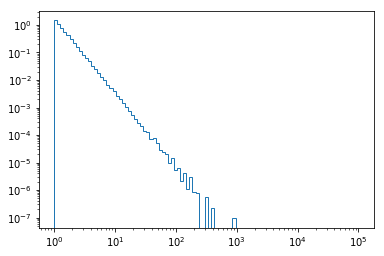

In [751]:
Fluss = CDF(Gleich)
plt.hist(Fluss, density = True, bins = np.logspace(0,5,100), histtype = 'step');
plt.yscale('log')
plt.xscale('log')

In [4]:
A1 = pd.DataFrame(data={'Energy':Fluss})

b)

In [5]:
def PDF2(x):
    return (1-np.exp(-x/2))**3

In [6]:
Gleich2 = np.random.uniform(0,1,int(1e5))

i_Flussb = (Gleich2<PDF2(Fluss))

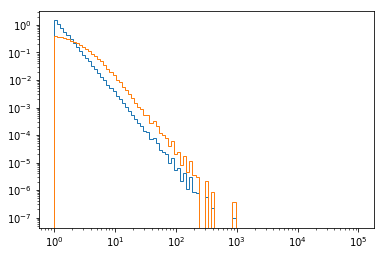

In [373]:
plt.hist(Fluss, density = True, bins = np.logspace(0,5,100), histtype = 'step');
plt.hist(Fluss[i_Flussb], density = True, bins = np.logspace(0,5,100), histtype = 'step');
plt.yscale('log')
plt.xscale('log')

In [415]:
A1['AccaptanceMask']=(Gleich2<PDF2(Fluss))

c)

In [435]:
def Polar(mu, sigma, rho, size):
    v1 = 2*np.random.uniform(-1,1, size)-1
    v2 = 2*np.random.uniform(-1,1, size)-1
    s = v1**2+v2**2
    while (True in (s>=1)):
        v1[s>=1] = 2*np.random.uniform(-1,1,len(s[s>=1]))-1
        v2[s>=1] = 2*np.random.uniform(-1,1,len(s[s>=1]))-1
        s[s>=1] = v1[s>=1]**2+v2[s>=1]**2
    x = v1*np.sqrt(-2/s*np.log(s))
    y = v2*np.sqrt(-2/s*np.log(s))
    x_true = np.sqrt(1-rho**2)*sigma*x + rho*sigma*y+mu
    y_true = sigma*y+mu
    return x_true, y_true

In [437]:
def Hits(E):
    N_Hits = 0
    while N_Hits==0:
        Hit = Polar(10*E,2*E,0,1)[1]
        if Hit[0]>0:
            N_Hits = np.round(np.max(Hit))
    return N_Hits

NumberofHits = [Hits(n) for n in Fluss]

In [438]:
A1['NumberofHits']=NumberofHits

d)

In [720]:
def sigmaD(N):
    return 1/np.log10(N+1)

def Orte(N):
    x = Polar(7,sigmaD(N),0,len(N))[0]
    y = Polar(3,sigmaD(N),0,len(N))[1]
    while (True in (x<0) or True in (x>10)):
        x[x<0] = Polar(7, sigmaD(N[x<0]), 0, len(x[x<0]))[0]
        x[x>10] = Polar(7, sigmaD(N[x>10]), 0, len(x[x>10]))[0]
    while (True in (y<0) or True in (y>10)):
        y[y<0] = Polar(7, sigmaD(N[y<0]), 0, len(y[y<0]))[1]
        y[y>10] = Polar(7, sigmaD(N[y>10]), 0, len(y[y>10]))[1]
    return x, y

def OrteE(N, sigma, rho):
    x = Polar(5,sigma,rho,len(N))[0]
    y = Polar(5,sigma,rho,len(N))[1]
    while (True in (x<0) or True in (x>10)):
        x[x<0] = Polar(5, sigma, rho, len(x[x<0]))[0]
        x[x>10] = Polar(5, sigma, rho, len(x[x>10]))[0]
    while (True in (y<0) or True in (y>10)):
        y[y<0] = Polar(5, sigma, rho, len(y[y<0]))[1]
        y[y>10] = Polar(5, sigma, rho, len(y[y>10]))[1]
    return x, y

In [721]:
Koord = Orte(np.asarray(NumberofHits))

In [722]:
A1['x-Koord']=Koord[0]
A1['y-Koord']=Koord[1]

e)

In [739]:
Hitse = Polar(2,1,0,10**7)[1]

In [741]:
Hits_truee = [10**n for n in Hitse]
Untergrund = pd.DataFrame(data={'NumberofHits':Hits_truee})

In [742]:
KoordE = OrteE(np.asarray(Hits_truee), 3, 0.5)

In [743]:
Untergrund['x'] = KoordE[0]
Untergrund['y'] = KoordE[1]

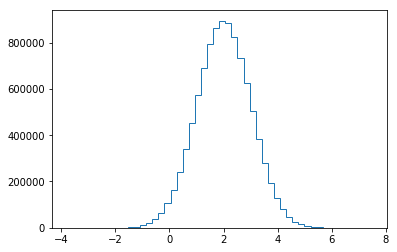

In [744]:
plt.clf()
plt.hist(Hitse, bins = 50, histtype = 'step');

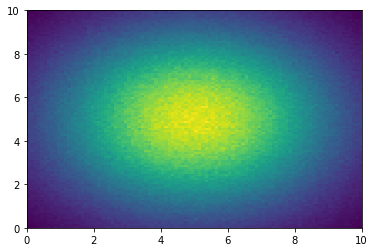

In [745]:
plt.hist2d(Untergrund['x'], Untergrund['y'], bins = [100,100]);

## Aufgabe 14

a)

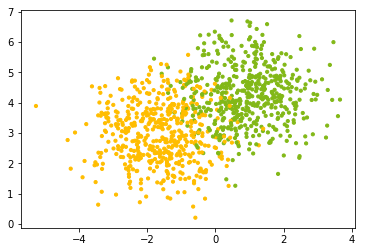

In [767]:
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

discrete_cmap = ListedColormap([(0.51, 0.72, 0.09), (0.34, 0.98, 0.95), (1, 0.74, 0.0)])

X, y = make_blobs(n_samples=1000, centers=2, n_features=4, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap = discrete_cmap);


b)

c)

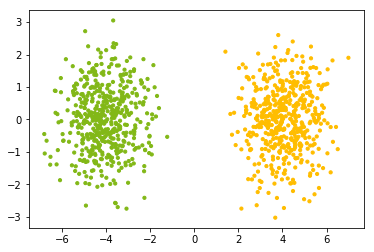

In [768]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed = pca.fit_transform(X)
plt.scatter(transformed[:, 0], transformed[:, 1], c=y, s=10, cmap = discrete_cmap);